<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Une-régression-logistique-sur-la-couleur-d'un-vin" data-toc-modified-id="Une-régression-logistique-sur-la-couleur-d'un-vin-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Une régression logistique sur la couleur d'un vin</a></span><ul class="toc-item"><li><span><a href="#Importer-les-librairies" data-toc-modified-id="Importer-les-librairies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importer les librairies</a></span></li><li><span><a href="#Importer-les-données" data-toc-modified-id="Importer-les-données-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importer les données</a></span></li><li><span><a href="#Un-peu-de-dataviz" data-toc-modified-id="Un-peu-de-dataviz-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Un peu de dataviz</a></span></li><li><span><a href="#Création-d'un-train-set-et-test-set" data-toc-modified-id="Création-d'un-train-set-et-test-set-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Création d'un train set et test set</a></span></li><li><span><a href="#Création-et-entraînement-du-modèle" data-toc-modified-id="Création-et-entraînement-du-modèle-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Création et entraînement du modèle</a></span></li><li><span><a href="#Évaluation-du-modèle" data-toc-modified-id="Évaluation-du-modèle-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Évaluation du modèle</a></span></li></ul></li></ul></div>

# Une régression logistique sur la couleur d'un vin

L'objectif de cet exercice est de prédire la couleur d'un vin à partir de ses composants et visualiser la performance avec une courbe ROC.

## Importer les librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importer les données

Vous pouvez allez chercher les données [là](https://archive.ics.uci.edu/ml/datasets/wine+quality).  
Vous verrez que l'on a 2 tables : une pour les vins rouges et une pour les vins blancs. La première étape consistera donc à fusionner ces deux datasets pour en avoir un seul

In [3]:
reds = pd.read_csv('data/winequality-red.csv',sep=";")
reds["color"]='red'
reds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [5]:
whites = pd.read_csv('data/winequality-white.csv', sep=";")
whites["color"] = 'white'
whites

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [6]:
wines = pd.concat([reds,whites],axis=0)
wines.reset_index(drop=True, inplace=True)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [7]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Un peu de dataviz

Quelques graphiques pour visualiser les distributions des différentes variables indépendantes selon la couleur du vin.

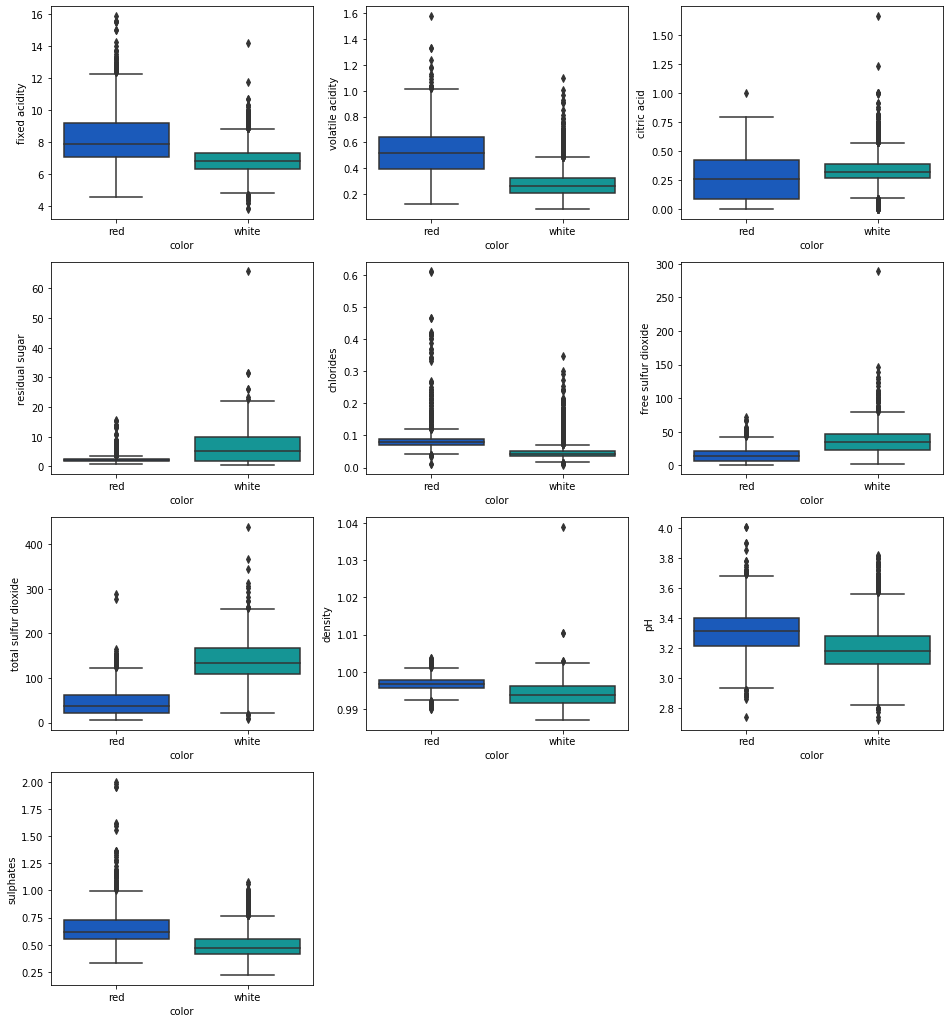

In [9]:
fig = plt.figure(figsize=(16,18))
ax = []
for i in range(10):
    ax.append(fig.add_subplot(4,3,i+1))
    sns.boxplot(x='color',y=wines.columns[i],data=wines,palette='winter',ax=ax[i])

## Création d'un train set et test set

In [10]:
X = wines.drop(['quality', 'color'], axis=1)
y = wines['color']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Création et entraînement du modèle

In [12]:
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression()
reglog.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Évaluation du modèle

La première façon de vérifier que le modèle a marché consiste à regarder la matrice de confusion.

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, reglog.predict(X_test))
cm

array([[ 359,   19],
       [   9, 1238]], dtype=int64)

In [14]:
# on peut faire un affichage plus "joli" avec un DataFrame
cm = pd.DataFrame(cm, columns=['prédit ' + _ for _ in reglog.classes_])
cm.index = ['vrai ' + _ for _ in reglog.classes_]
cm

,prédit red,prédit white
vrai red,359,19
vrai white,9,1238


Un classifieur construit une frontière entre deux classes, la distance d'un point à la frontière constitue une information importante. Plus elle est grande, plus le modèle est confiant. Cette distance est souvent appelée *score*.

In [15]:
score = reglog.decision_function(X_test)
score

array([ 1.99556275,  7.54345733,  9.1234758 , ..., -5.09381133,
        5.21641074,  3.660439  ])

Mais on préfère les probabilités quand elles sont disponibles :

In [16]:
probas = reglog.predict_proba(X_test)
probas

array([[1.19669592e-01, 8.80330408e-01],
       [5.29283287e-04, 9.99470717e-01],
       [1.09062999e-04, 9.99890937e-01],
       ...,
       [9.93902809e-01, 6.09719050e-03],
       [5.39748138e-03, 9.94602519e-01],
       [2.50762276e-02, 9.74923772e-01]])

Voyons comment le score est distribué :

In [17]:
sc = pd.DataFrame(score, columns=['score'])
sc['color'] = y_test.values
sc.head()

,score,color
0,1.995563,white
1,7.543457,white
2,9.123476,white
3,5.575797,white
4,6.084683,white


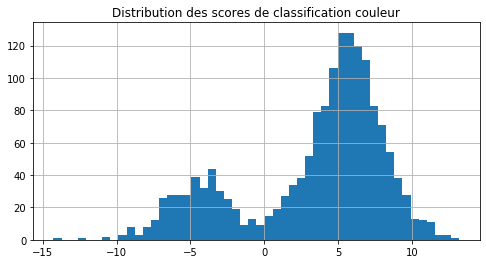

In [18]:
ax = sc['score'].hist(bins=50, figsize=(8,4))
ax.set_title('Distribution des scores de classification couleur');

On voit deux modes, probablement les deux classes. Pour en être sûr :

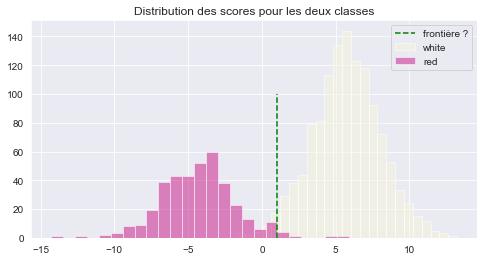

In [19]:
sns.set_style('darkgrid')
ax = sc[sc.color== 'white']['score'].hist(bins=25, figsize=(8,4), label='white', color='beige', alpha=0.5)
sc[sc.color == 'red']['score'].hist(bins=25, ax=ax, label='red', color = 'mediumvioletred', alpha=0.5)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([1, 1], [0, 100], color='green', ls='--', label="frontière ?")
ax.legend();

Il y a quelques confusions autour de 0 mais le modèle est pertinent au sens où la frontière entre les deux classes est assez nette : les deux cloches ne se superposent pas. Voyons avec les probabilités :

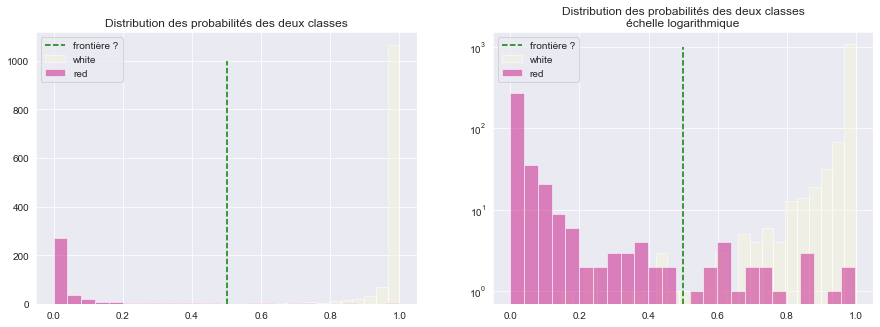

In [20]:
proba_1 = reglog.predict_proba(X_test)[:, 1]
pr = pd.DataFrame(proba_1, columns=['proba'])
pr['color'] = y_test.values

fig, ax = plt.subplots(1, 2, figsize=(15,5))

pr[pr.color == 'white']['proba'].hist(bins=25, label='white', color = 'beige', alpha=0.5, ax=ax[0])
pr[pr.color == 'red']['proba'].hist(bins=25, label='red', color = 'mediumvioletred', alpha=0.5, ax=ax[0])
ax[0].set_title('Distribution des probabilités des deux classes')
ax[0].plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax[0].legend();

#l'échelle logarithmique permet de mieux voir les probabilités qui sont faibles
pr[pr.color == 'white']['proba'].hist(bins=25, label='white', color = 'beige', alpha=0.5, ax=ax[1])
pr[pr.color == 'red']['proba'].hist(bins=25, label='red', color = 'mediumvioletred', alpha=0.5, ax=ax[1])
ax[1].plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax[1].set_yscale('log')
ax[1].set_title('Distribution des probabilités des deux classes\néchelle logarithmique')
ax[1].legend();

Plus l'aire commune aux deux distributions est petite, plus le modèle est confiant. Cette aire commune est reliée à la courbe [ROC](https://fr.wikipedia.org/wiki/Courbe_ROC).

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = reglog.predict_proba(X_test)
fpr0, tpr0, thresholds0 = roc_curve(y_test, proba[:, 0], pos_label=reglog.classes_[0], drop_intermediate=False)

*fpr* désigne le False Positive Rate autrement dit le taux de false positive. Si la tâche est de déterminer si un vin est blanc, le taux désigne la proportion de vins rouges classés parmi les vins blancs. C'est l'erreur de classification.

*tpr* désigne le True Positive Rate c'est-à-dire le taux de True Positive.

J'ai jamais été complètement au clair sur ce que représente chacune de ces informations mais l'avantage c'est qu'on trouve toujours toutes les infos dont on a besoin le moment venu. Par exemple, [ici](https://en.wikipedia.org/wiki/Precision_and_recall)

In [22]:
tp = pd.DataFrame(dict(fpr=fpr0, tpr=tpr0, threshold=thresholds0)).copy()
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2
tp.head(3)

,fpr,tpr,threshold
1,0.0,0.002646,0.999999
2,0.0,0.005291,0.999995
3,0.0,0.007937,0.999981


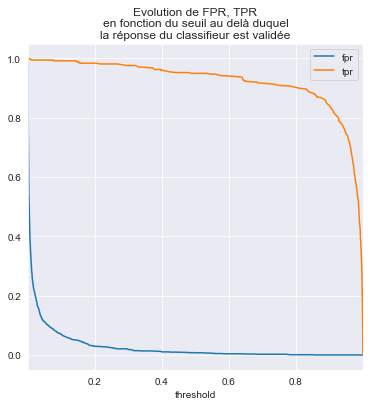

In [23]:
ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée");

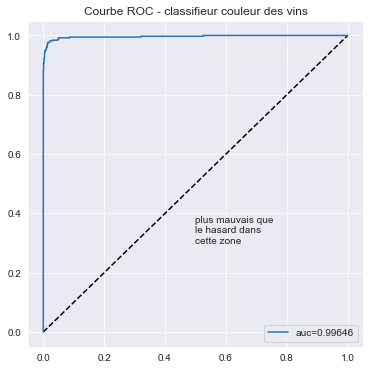

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
# aucf = roc_auc_score(y_test == clr.classes_[0], probas[:, 0]) # première méthode
aucf = auc(fpr0, tpr0)  # seconde méthode
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur couleur des vins')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend();

La mesure [AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) ou Area Under the Curve est l'aire sous la courbe.

Deux autres métriques sont très utilisées, la [précision](https://en.wikipedia.org/wiki/Precision_and_recall) et le [rappel](https://en.wikipedia.org/wiki/Precision_and_recall). Pour chaque classifieur, on peut déterminer un seuil *s* au delà duquel la réponse est validée avec une bonne confiance. Parmi toutes les réponses validées, la précision est le nombre de réponses correctes rapporté au nombre de réponses validées, le rappel est le nombre de réponses correctes rapportées à toutes qui aurait dû être validées. On calcule aussi la métrique *F1* qui est une sorte de moyenne entre les deux.

In [25]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probas[:, 0], pos_label=reglog.classes_[0])

In [26]:
pr = pd.DataFrame(dict(precision=precision, recall=recall, 
                             threshold=[0] + list(thresholds)))
pr['F1']= 2 * (pr.precision * pr.recall) / (pr.precision + pr.recall)
pr.head(n=2)

,precision,recall,threshold,F1
0,0.365571,1.000000,0.000000,0.535411
1,0.364956,0.997354,0.002758,0.534373


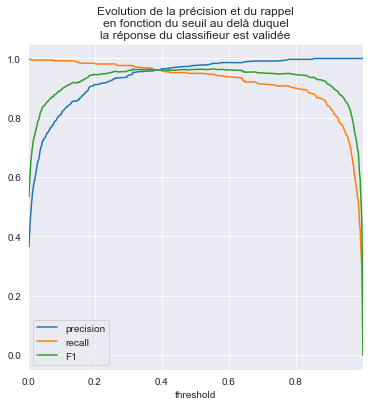

In [27]:
ax = pr.plot(x="threshold", y=['precision', 'recall', 'F1'], figsize=(6,6))
ax.set_title("Evolution de la précision et du rappel\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée");